In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
np.random.seed(123) #when ever we select random it wont change

In [4]:
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples  - n_class_0

In [5]:
n_class_0, n_class_1

(900, 100)

In [12]:
# we are creating 900 data points
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc =0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc = 0, scale =1 , size= n_class_0),
    'target': [0]*n_class_0
})
# creating 100 data points
class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc =2,scale=1,size=n_class_1), #loc refers to mean and scale refers to standard distribution
    'feature_2' : np.random.normal(loc = 2, scale =1 , size= n_class_1),
    'target': [1]*n_class_1
})

In [13]:
df = pd.concat([class_0,class_1]).reset_index(drop=True) #it drops the index

In [14]:
df

,feature_1,feature_2,target
0,1.586350,1.498609,0
1,0.798713,-0.172506,0
2,-0.983213,0.558718,0
3,0.085812,0.145188,0
4,0.536751,0.392016,0
...,...,...,...
995,1.680879,1.462846,1
996,3.441003,2.486713,1
997,1.091364,3.006645,1
998,4.644096,2.323907,1


In [16]:
## upsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [19]:
#we have upsampled the data from 100 to 900
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority , replace = True,n_samples = len(df_majority),
        random_state = 42)

In [21]:
df_majority_downsampled = resample(df_majo)

900

# SMOTE

In [22]:
from sklearn.datasets import make_classification

In [30]:
#creating an imbalanced dataset with 1000 samples and 2 features and 90% in one feature
X,y = make_classification(n_samples =1000,n_redundant=0,n_features=2,n_clusters_per_class=1 , weights= [0.90],random_state=12)

In [57]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final = pd.concat([df1,df2],axis=1)

In [58]:
final

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [68]:
len(final[final['target']==1])

100

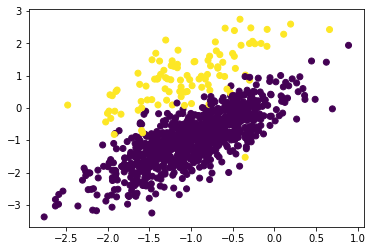

In [70]:
import matplotlib.pyplot as plt
plt.scatter(final['f1'],final['f2'],c = final['target'])

In [71]:
!pip install imblearn

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dhana\\AppData\\Local\\Temp\\pip-uninstall-ytr25or_\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [80]:
from imblearn.over_sampling import SMOTE

In [82]:
oversample = SMOTE()
x,y = oversample.fit_resample(final[['f1','f2']],final[['target']])

In [93]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final = pd.concat([df1,df2],axis=1)

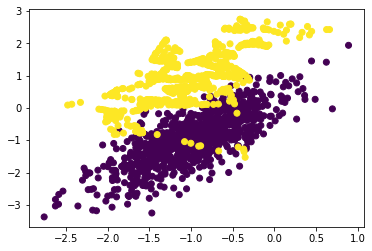

In [94]:
import matplotlib.pyplot as plt
plt.scatter(final['f1'],final['f2'],c = final['target'])